In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = 'capacity vs scan rate_1'
data = pd.read_excel(f'{file_name}.xlsx')
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,37.133333,0.569600,43.8,2.18505,33.600000,2.107131,31.078836,0.873461,14.166667,2.086731
1,5,25.566667,0.993870,32.0,2.18505,28.333333,2.380710,21.049206,1.462616,5.122222,0.789827
2,10,20.600000,1.159023,27.0,2.18505,25.333333,2.493547,17.492063,1.413899,3.355556,0.576173
3,25,14.700000,1.193035,20.8,2.18505,20.800000,2.433105,13.705291,1.018286,2.211111,0.397368
4,50,10.433333,1.071344,15.3,2.18505,17.033333,1.705221,10.697884,0.584323,1.744444,0.331290


Number of lines:  10


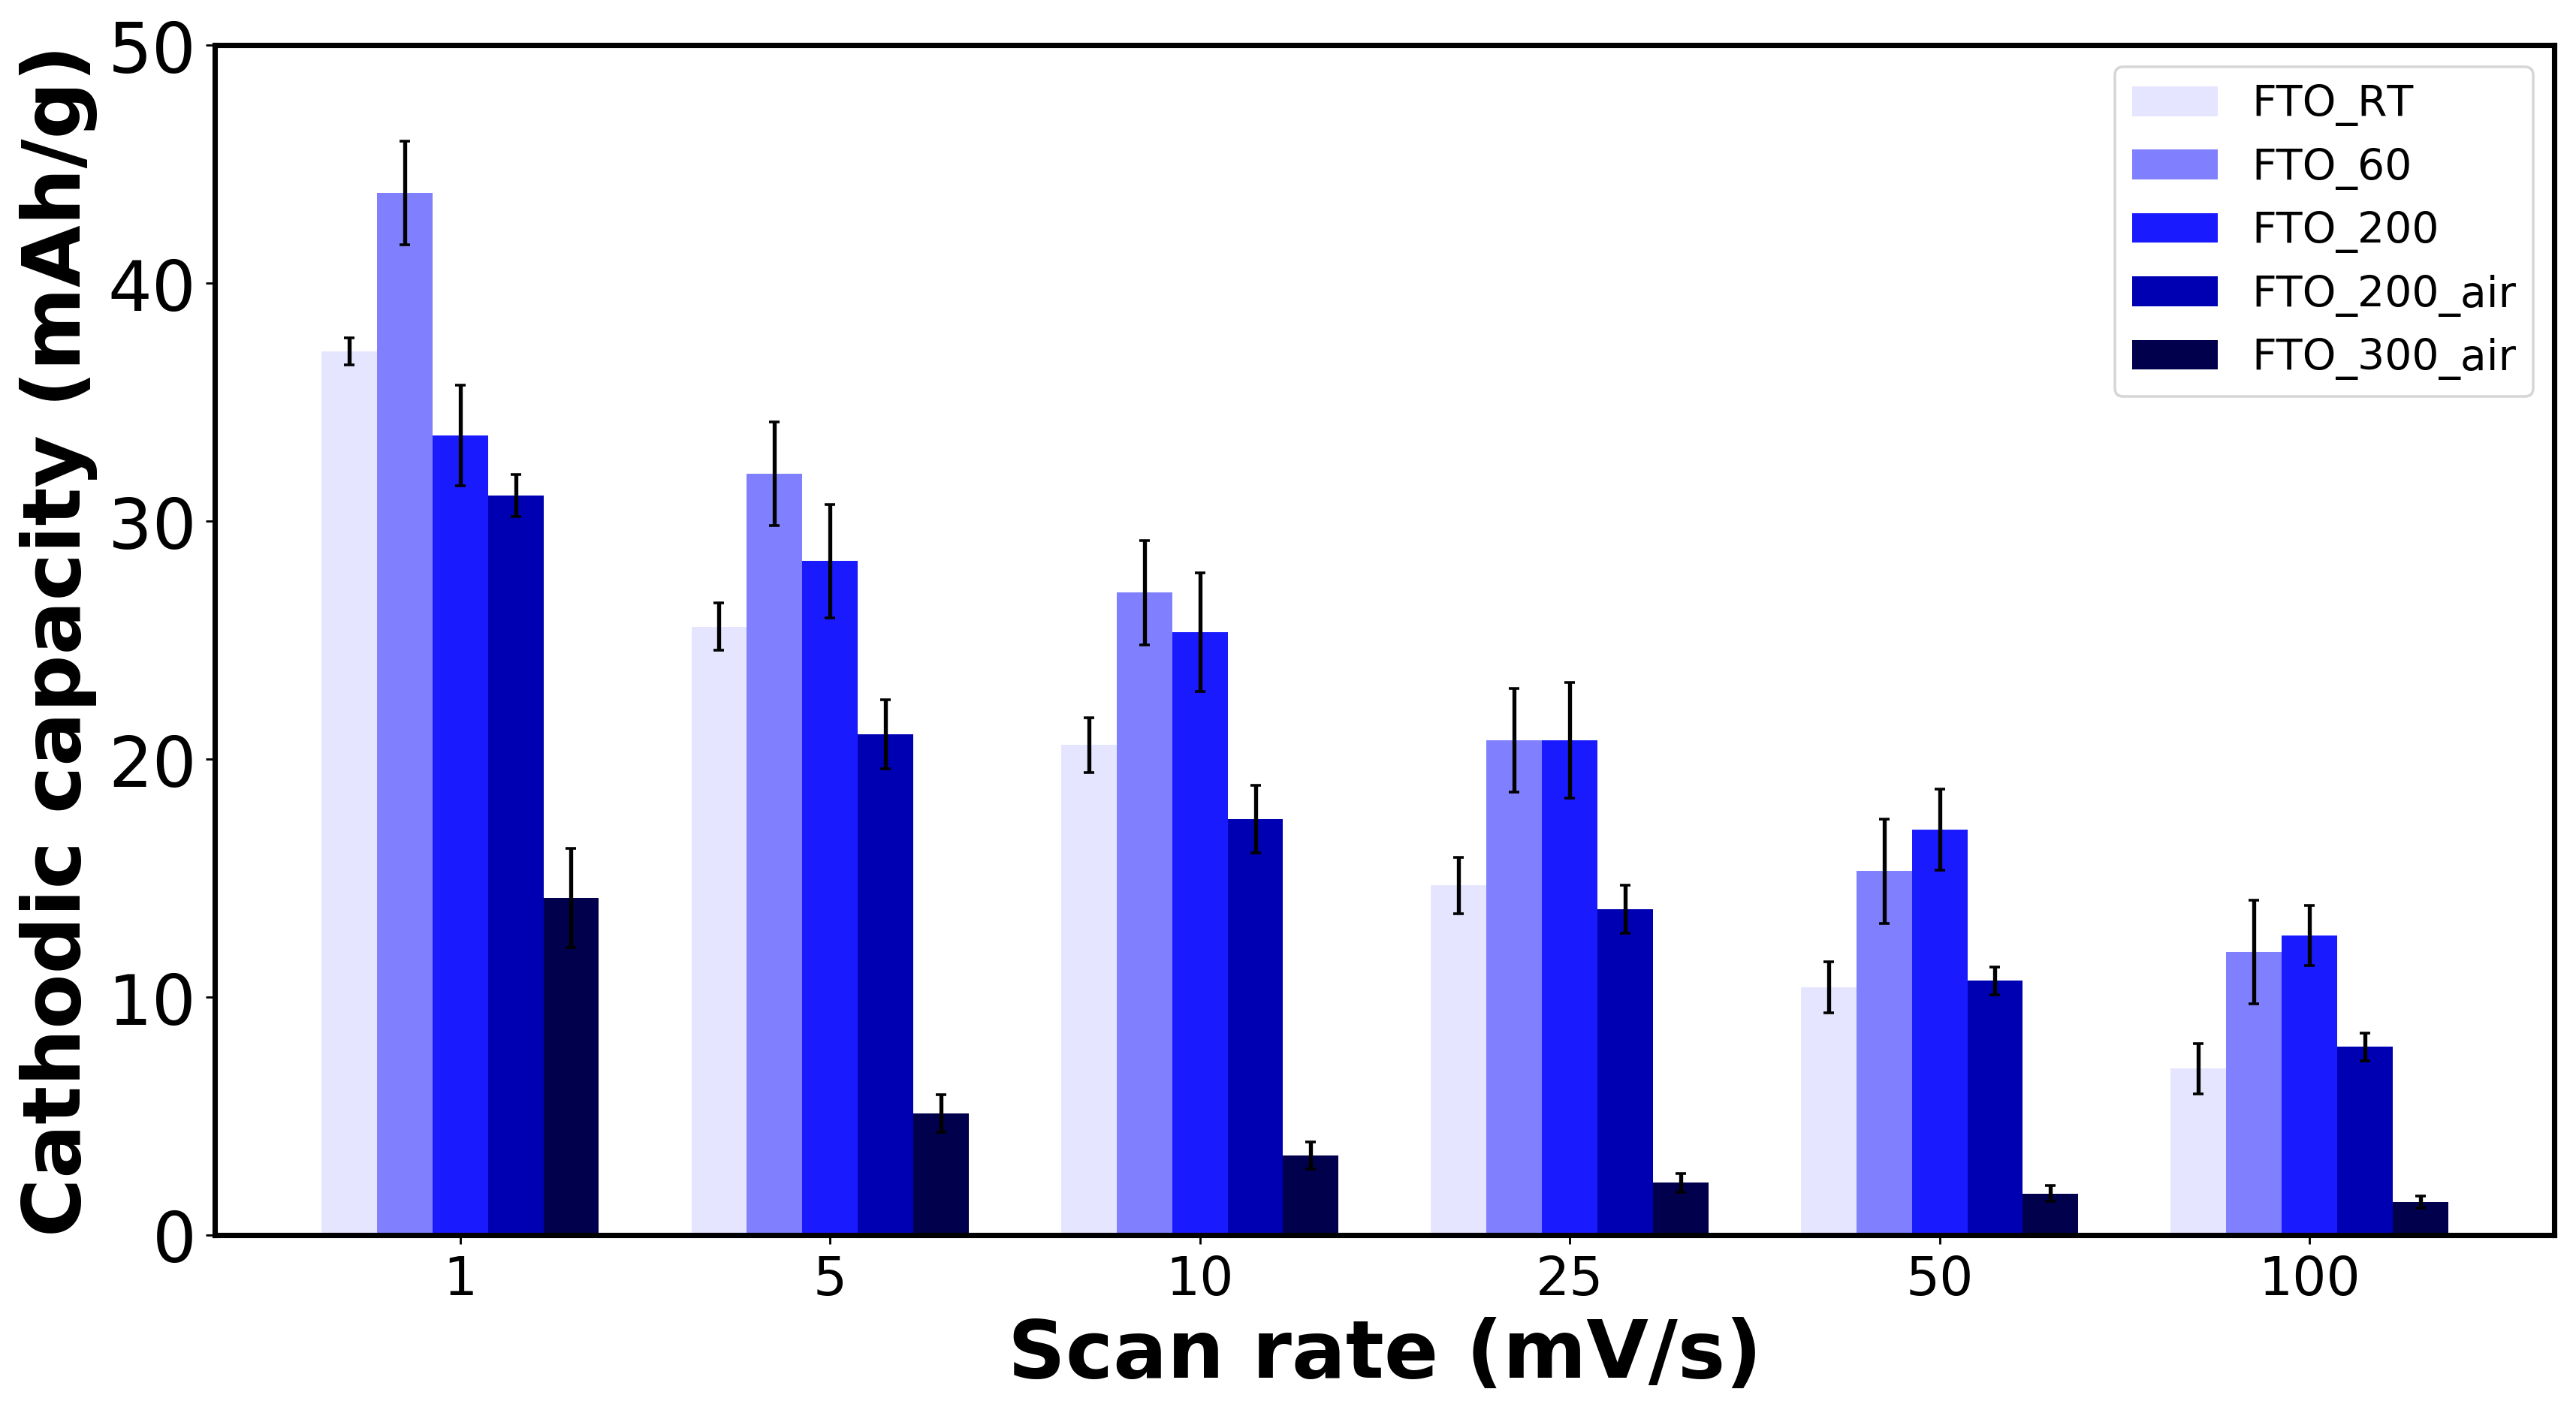

In [81]:
def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

fig, ax = plt.subplots(figsize=(15.7, 8.2), dpi=256)
legend = ['FTO_RT', 'FTO_60', 'FTO_200', 'FTO_200_air', 'FTO_300_air']
c = -0.3
w = 0.15
x_name = ['1', '5', '10', '25', '50', '100']
x = np.arange(len(x_name))

for i in range(0, len(legend)*2 - 1, 2):
    c +=0.4
    ax.bar(x + i*w/2,
           np.array(data.iloc[:, i+1]),
           yerr = np.array(data.iloc[:, i+2]),
           label = legend[int(i/2)],
           width = w,
           align = 'center',
           color=lighten_color('blue', c),
           capsize=2
          )

print('Number of lines: ', len(ax.lines)) 

ax.legend(loc = 'upper right', fontsize = 16)
plt.ylabel('Cathodic capacity (mAh/g)', fontsize = 30, weight = 'bold')
plt.xlabel('Scan rate (mV/s)', fontsize = 30, weight = 'bold')
plt.xticks(x+w*2, x_name)

#plt.text(0.03, 1100, file_name, fontsize = 22, color = 'red')

ax.yaxis.set_tick_params(labelsize=26)
ax.xaxis.set_tick_params(labelsize=20)
#plt.minorticks_on()

ax.set_ylim(0, 50)
#ax.set_xlim(0, 110)
            
ax.spines["bottom"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

plt.savefig(f'CV_{file_name}_bar2.tif', bbox_inches = 'tight')

plt.show()